We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df = read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv")
df %>% print

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



# A tibble: 403 x 69
   EPISODE TITLE APPLE_FRAME AURORA_BOREALIS  BARN BEACH  BOAT BRIDGE BUILDING
   <chr>   <chr>       <dbl>           <dbl> <dbl> <dbl> <dbl>  <dbl>    <dbl>
 1 S01E01  "\"A…           0               0     0     0     0      0        0
 2 S01E02  "\"M…           0               0     0     0     0      0        0
 3 S01E03  "\"E…           0               0     0     0     0      0        0
 4 S01E04  "\"W…           0               0     0     0     0      0        0
 5 S01E05  "\"Q…           0               0     0     0     0      0        0
 6 S01E06  "\"W…           0               0     0     0     0      0        0
 7 S01E07  "\"A…           0               0     0     0     0      0        0
 8 S01E08  "\"P…           0               0     0     0     0      0        0
 9 S01E09  "\"S…           0               0     0     1     0      0        0
10 S01E10  "\"M…           0               0     0     0     0      0        0
# … with 393 more rows, and 60 

In [3]:
df1 = df %>% 
      pivot_longer(cols = -one_of('EPISODE','TITLE'),
                   names_to='element', values_to='count') %>%
      filter(count>0) %>%
      mutate(element = fct_infreq(element) %>% fct_lump(n=10)%>% fct_rev) %>%
      print

# A tibble: 3,221 x 4
   EPISODE TITLE                     element   count
   <chr>   <chr>                     <fct>     <dbl>
 1 S01E01  "\"A WALK IN THE WOODS\"" BUSHES        1
 2 S01E01  "\"A WALK IN THE WOODS\"" DECIDUOUS     1
 3 S01E01  "\"A WALK IN THE WOODS\"" GRASS         1
 4 S01E01  "\"A WALK IN THE WOODS\"" RIVER         1
 5 S01E01  "\"A WALK IN THE WOODS\"" TREE          1
 6 S01E01  "\"A WALK IN THE WOODS\"" TREES         1
 7 S01E02  "\"MT. MCKINLEY\""        Other         1
 8 S01E02  "\"MT. MCKINLEY\""        CLOUDS        1
 9 S01E02  "\"MT. MCKINLEY\""        CONIFER       1
10 S01E02  "\"MT. MCKINLEY\""        MOUNTAIN      1
# … with 3,211 more rows


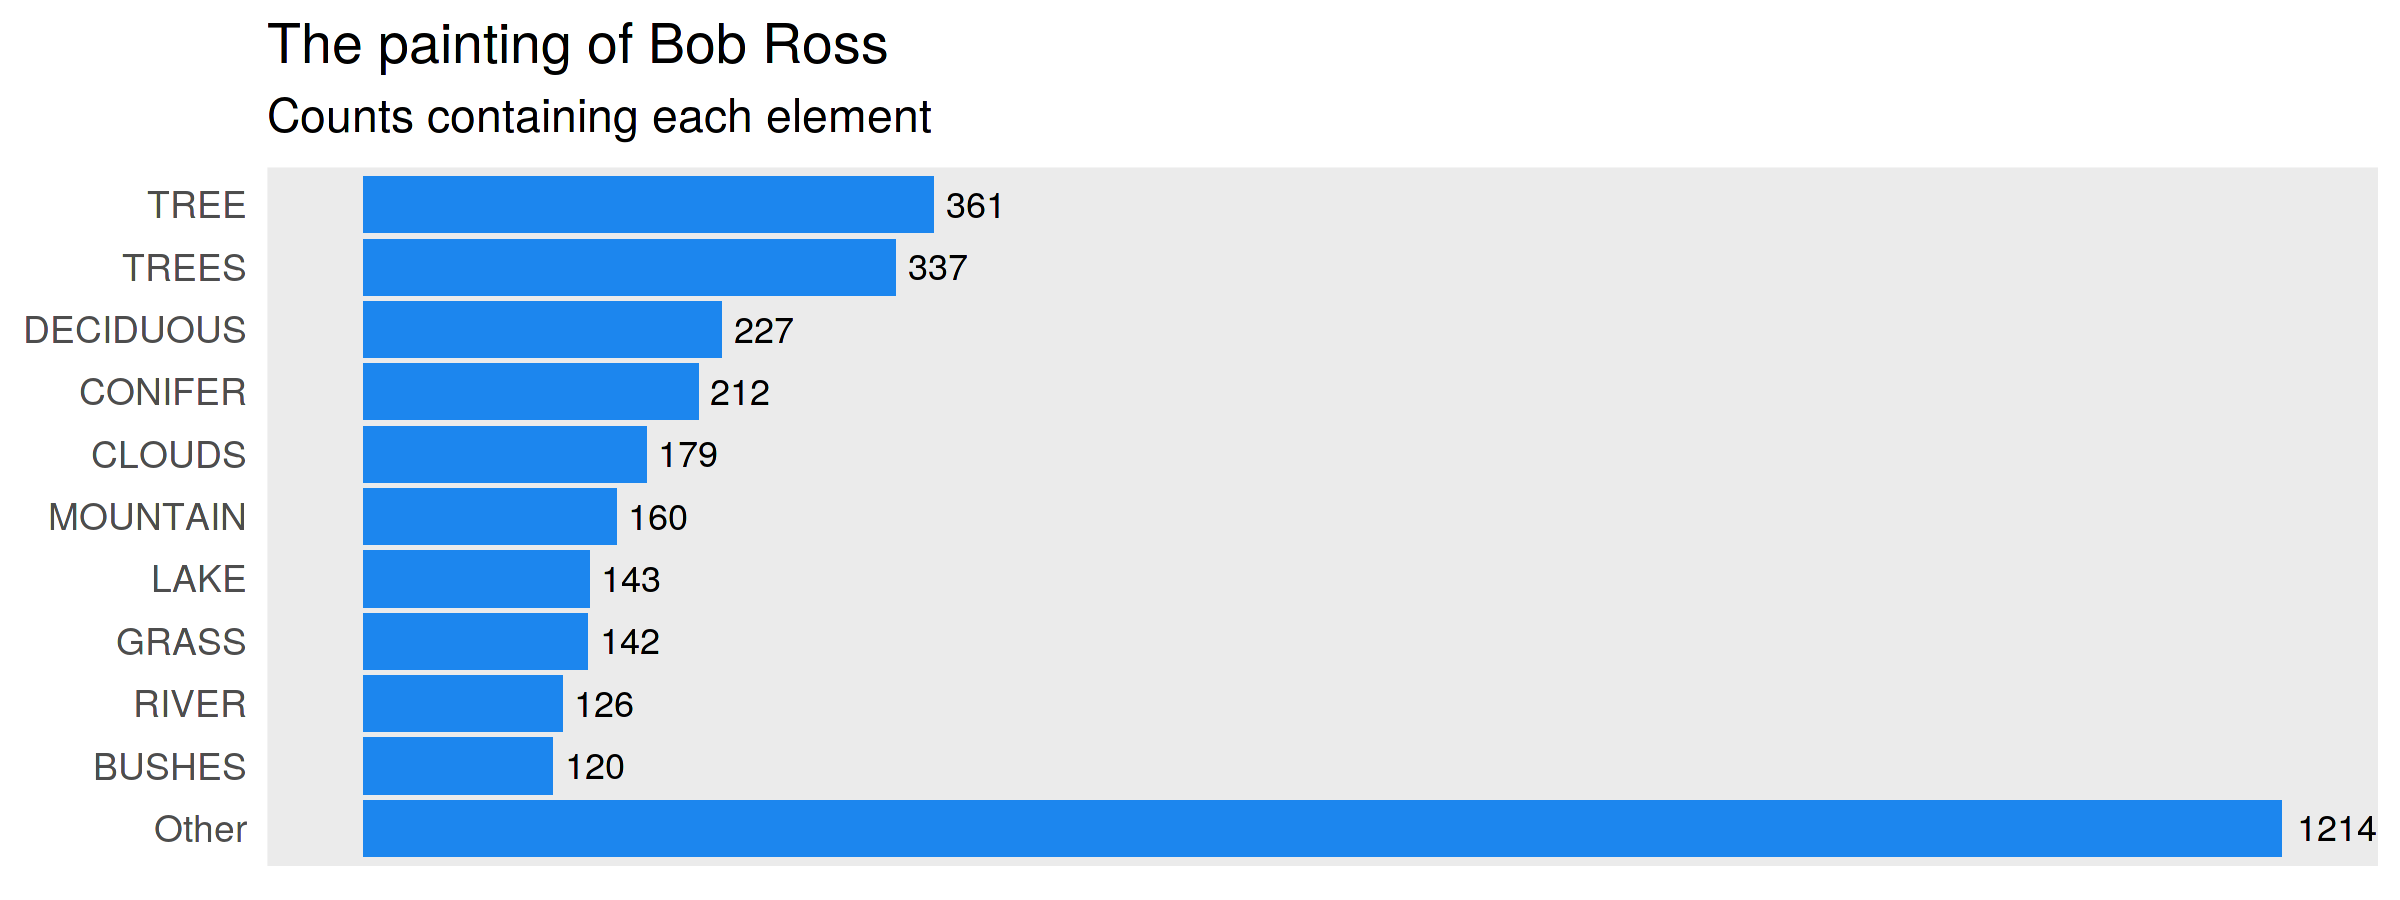

In [4]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 3)

p = ggplot(df1, aes(x= element, y=..count..),width= 0.8) + geom_bar(fill='dodgerblue2') + coord_flip()

p = p + geom_text(stat='count',aes(label = ..count..),size = 3,hjust = -0.2)

p = p + theme(axis.text.x = element_blank(),axis.title.x = element_blank(), axis.title.y= element_blank())

p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.ticks =element_blank())

p = p + labs(title = "The painting of Bob Ross",
             subtitle = "Counts containing each element")

p

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 